In [1]:
import numpy as np
import pandas as pd
import math as m
import sympy as sym
import random as rand
import matplotlib.pyplot as plt
import Functions_module_beta as fn
import custom_functions_01 as cf
from custom_functions_01 import Four_list
from custom_functions_01 import avg_prob_with_confidence
from custom_functions_01 import avg_prob_with_confidence_alternative
from Functions_module_beta import SystemAction
from custom_functions_GD import Gradient_modified
from custom_functions_GD import GDSearch_modified


# from Functions_module_beta import AvgProbability

In [2]:
# defining gradient function
# priors_list = [.25,.25,.25,.25]
def Gradient_modified(splitters, c = 1, quantity = 'avgprob' , angle_theta = 45,  delta = .001, machine_precision = .001 , priors_list = [.25,.25,.25,.25]):
    [a,b,c,d,e,f] = [i for i in splitters]

    # print([a,b,c,d,e,f],splitters)
    

    initial_avg_prob = avg_prob_with_confidence_alternative(confidence = c, quantity= quantity , custom_splitters= splitters, index_15k= False, index_729= False, theta = angle_theta, four_list_compared= False, raw_four_list= False, machine_uncertainty = machine_precision, priors = priors_list)

    partial_a = (avg_prob_with_confidence_alternative(confidence = c, quantity= quantity,  custom_splitters= [a+delta,b,c,d,e,f], index_15k= False, index_729= False, theta = angle_theta, four_list_compared= False, raw_four_list= False, machine_uncertainty = machine_precision, priors = priors_list)- initial_avg_prob)/delta
    partial_b = (avg_prob_with_confidence_alternative(confidence = c, quantity= quantity,  custom_splitters= [a,b+delta,c,d,e,f], index_15k= False, index_729= False, theta = angle_theta, four_list_compared= False, raw_four_list= False, machine_uncertainty = machine_precision, priors = priors_list)- initial_avg_prob)/delta
    partial_c = (avg_prob_with_confidence_alternative(confidence = c, quantity= quantity,  custom_splitters= [a,b,c+delta,d,e,f], index_15k= False, index_729= False, theta = angle_theta, four_list_compared= False, raw_four_list= False, machine_uncertainty = machine_precision, priors = priors_list)- initial_avg_prob)/delta
    partial_d = (avg_prob_with_confidence_alternative(confidence = c, quantity= quantity,  custom_splitters= [a,b,c,d+delta,e,f], index_15k= False, index_729= False, theta = angle_theta, four_list_compared= False, raw_four_list= False, machine_uncertainty = machine_precision, priors = priors_list)- initial_avg_prob)/delta
    partial_e = (avg_prob_with_confidence_alternative(confidence = c, quantity= quantity,  custom_splitters= [a,b,c,d,e+delta,f], index_15k= False, index_729= False, theta = angle_theta, four_list_compared= False, raw_four_list= False, machine_uncertainty = machine_precision, priors = priors_list)- initial_avg_prob)/delta
    partial_f = (avg_prob_with_confidence_alternative(confidence = c, quantity= quantity,  custom_splitters= [a,b,c,d,e,f+delta], index_15k= False, index_729= False, theta = angle_theta, four_list_compared= False, raw_four_list= False, machine_uncertainty = machine_precision, priors = priors_list)- initial_avg_prob)/delta

    Gradient = [partial_a,partial_b,partial_c,partial_d,partial_e,partial_f]
    return Gradient


In [3]:
# Defining Gradient search function for a given confidence and theta values.
def GDSearch_modified(starting_point = [0,0,0,0,0,0], quantity = 'avgprob' , c_threshold = 1, theta = 45, iterations = 25, step = .01, calculations = False, calc_precision = .0001 , priors = [.25,.25,.25,.25], deriv_delta = .0001, double_deriv_method = False, random_step = False, adaptive_step = True ):
    new_splitters = starting_point 
    
    for i in range(iterations):
        grad = Gradient_modified(splitters = new_splitters, quantity= quantity, c = c_threshold, angle_theta = theta, machine_precision = calc_precision , priors_list = priors, delta = deriv_delta)
        
        # if random_step == True and [abs(i) < 1e-6 for i in grad]:
        #     index_choice = np.random.choice(6)
        #     new_splitters[index_choice] += -(0.1)

        # if double_deriv_method == True and [abs(i) < 1e-6 for i in grad]:    # the double deriv clause
        #     double_deriv = Double_deriv(splitters = [m1,m2,m3,m4,m5,m6], c = c_threshold, angle_theta = theta, machine_precision = calc_precision , priors_list = priors, delta = deriv_delta)
        #     # above gives the six double derivateives. We can use these to decide which direction to make a large move in.
        #     if [abs(i) < 1e-6 for i in double_deriv]:
        #         new_splitters = [(new_splitters[i]+ (10*step)) for i in range(6)]
        #     else:
        #         new_splitters = [(new_splitters[i]+ (10*step)*double_deriv[i]) for i in range(6)]
        
        # if double_deriv_method == False and random_step == False:
        if adaptive_step != False:
            new_splitters = [(new_splitters[i]+ step*(m.copysign(1,grad[i]))) for i in range(6)]        # the copysign thing is just finding the sign.
            print("yo")
        else:
            new_splitters = [(new_splitters[i]+ step*grad[i]) for i in range(6)]                    # adaptive rate - step depends on gradient size
            print("adaptive")

# possible ways to reduce calculations  - 

        if calculations == True:        # if need to analyze, shows intermediate steps
            print(f"\n gradient = {grad}")
            # if double_deriv_method == True:
            #     print(f"double_derivatives_list = {double_deriv}")
            print(f"Splitter_{i}= {new_splitters}")

    max_quant_splitters = new_splitters
    max_quant = avg_prob_with_confidence_alternative(custom_splitters = new_splitters, quantity = quantity , confidence= c_threshold, index_15k= False, index_729= False, theta= theta, four_list_compared= False, raw_four_list= False, machine_uncertainty= calc_precision, priors= priors)

    if calculations == True : print('starting_point = {starting_point}')      # to compare starting and final points
    if calculations == True :  # for showing intermediate steps
        starting_quant = avg_prob_with_confidence_alternative(custom_splitters = starting_point, quantity = quantity , confidence= c_threshold, index_15k= False, index_729= False, theta=theta, four_list_compared= False, raw_four_list= False, machine_uncertainty= calc_precision, priors= priors)
        final_quant    = avg_prob_with_confidence_alternative(custom_splitters = max_quant_splitters, quantity = quantity , confidence= c_threshold, index_15k= False, index_729= False, theta=theta, four_list_compared= False, raw_four_list= False, machine_uncertainty= calc_precision, priors= priors)
        if final_quant != 0: 
            fractioanl_increase = (final_quant- starting_quant)/final_quant       # not actually percent increaswe coz dividing by the final prob instead of starting prob.
        else:
            fractioanl_increase = 'None (Division by zero)'       # not actually percent increaswe coz dividing by the final prob instead of starting prob.
        print(f"starting quantity = {starting_quant}, result max quantity = {final_quant}, percent increase = {fractioanl_increase*100} ")

    return [max_quant, max_quant_splitters]       # the resultant maximum probability and the corresponding splitters
        

# maybe add double derivatives inside if condition- in case its already a minima point with first deriv = 0. 

Some saved data etc: 

s = [m.pi/2,0,m.pi/4,m.pi/4,m.pi/2,0]   # optimal splitters

s_02 = [m.pi/2,0,m.pi/4,m.pi/4,m.pi/2+.2,0]   # optimal splitters + some deviation = starting point for GD 

s_03 = [m.pi/2,0,m.pi/4,m.pi/4+.2,m.pi/2,0]   

s_04 = [m.pi/2,0,m.pi/4+.2,m.pi/4,m.pi/2,0]   

s_05 = [m.pi/2,0+.2,m.pi/4,m.pi/4,m.pi/2,0]   # different devitations

s_06 = [m.pi/2+.2,0,m.pi/4+.2,m.pi/4,m.pi/2,0]   

In [4]:
# Some saved data etc: 

s = [m.pi/2,0,m.pi/4,m.pi/4,m.pi/2,0]   # optimal splitters

s_02 = [m.pi/2,0,m.pi/4,m.pi/4,m.pi/2+.2,0]   # optimal splitters + some deviation = starting point for GD 

s_03 = [m.pi/2,0,m.pi/4,m.pi/4+.2,m.pi/2,0]   

s_04 = [m.pi/2,0,m.pi/4+.2,m.pi/4,m.pi/2,0]   

s_05 = [m.pi/2,0+.2,m.pi/4,m.pi/4,m.pi/2,0]   # different devitations

s_06 = [m.pi/2+.2,0,m.pi/4+.2,m.pi/4,m.pi/2,0]   

In [10]:
#checking if our fucntion with maxconf quantity gives expected values

print(avg_prob_with_confidence_alternative( custom_splitters = s , quantity= 'maxconf', theta= 45))   # works

conf_list1 = []
conf_list2 = []
conf_list3 = []
conf_list4 = []
conf_list5 = []
conf_list6 = []
conf_list7 = []

X = np.linspace(0,m.pi,50)
for i in X:
    sp1 = [m.pi/2,0,m.pi/4,m.pi/4,m.pi/2,0+i]   # Increasing one parameter at once 
    conf_list1.append(avg_prob_with_confidence_alternative(custom_splitters = sp1 , quantity= 'maxconf', theta= 45))
    sp2 = [m.pi/2,0,m.pi/4,m.pi/4,m.pi/2+i,0]
    conf_list2.append(avg_prob_with_confidence_alternative(custom_splitters = sp2 , quantity= 'maxconf', theta= 45))
    sp3 = [m.pi/2,0,m.pi/4,m.pi/4+i,m.pi/2,0]
    conf_list3.append(avg_prob_with_confidence_alternative(custom_splitters = sp3 , quantity= 'maxconf', theta= 45))
    sp4 = [m.pi/2,0,m.pi/4+i,m.pi/4,m.pi/2,0]
    conf_list4.append(avg_prob_with_confidence_alternative(custom_splitters = sp4 , quantity= 'maxconf', theta= 45))
    sp5 = [m.pi/2,0+i,m.pi/4,m.pi/4,m.pi/2,0]
    conf_list5.append(avg_prob_with_confidence_alternative(custom_splitters = sp5 , quantity= 'maxconf', theta= 45))
    sp6 = [m.pi/2+i,0,m.pi/4,m.pi/4,m.pi/2,0]
    conf_list6.append(avg_prob_with_confidence_alternative(custom_splitters = sp6 , quantity= 'maxconf', theta= 45))
    sp7 = [m.pi/2+i,0+i,m.pi/4+i,m.pi/4+i,m.pi/2+i,0+i]   # increasing all at once
    conf_list7.append(avg_prob_with_confidence_alternative(custom_splitters = sp7 , quantity= 'maxconf', theta= 45))



0.124999723809


In [13]:
print(min(conf_list1), min(conf_list2), min(conf_list3), min(conf_list5))

0.09489942330625 0.124999723809 0.09489942330625 0.05156282855025


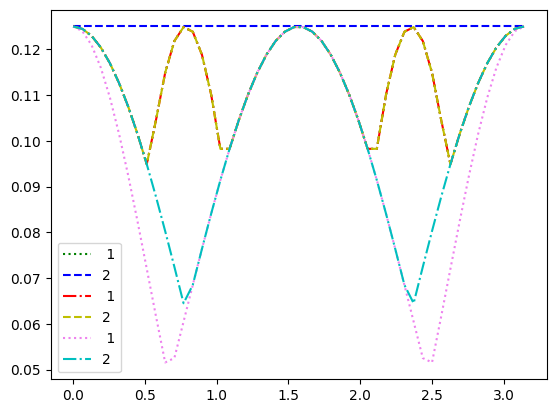

In [12]:
# plotting how max confidence looks like
plt.plot(X,conf_list1, linestyle = 'dotted',c= 'g',label=' 1')
plt.plot(X,conf_list2, linestyle = 'dashed',c= 'b',label= '2')
plt.plot(X,conf_list3, linestyle = '-.',c= 'r',label=' 1')
plt.plot(X,conf_list4, linestyle = 'dashed',c= 'y',label= '2')
plt.plot(X,conf_list5, linestyle = 'dotted',c= 'violet',label=' 1')
plt.plot(X,conf_list6, linestyle = '-.',c= 'c',label= '2')
plt.legend()
# Q: why is max confidnece dropping below .1 ? Other than that verified to be good.

In [7]:
GDSearch_modified(starting_point = [0,0,0,0,0,0], quantity = 'avgprob' , c_threshold = 1, theta = 45, iterations = 5, step = .01, calculations = True)

yo

 gradient = [9.800000033699519e-05, 0.0001470100008393871, 0.00014700999972916406, 0.00014700999972916406, 0.0001470100008393871, 9.800000033699519e-05]
Splitter_0= [0.01, 0.01, 0.01, 0.01, 0.01, 0.01]
yo

 gradient = [-0.021195085000424996, 0.0018869700002532852, -0.0015080424997648834, 0.0018138275004186966, 0.00556250749905729, -0.021195085000424996]
Splitter_1= [0.0, 0.02, 0.0, 0.02, 0.02, 0.0]
yo

 gradient = [0.0006433224997159925, 0.007108415001066959, 0.0036272024994676855, 0.0035232200001900082, 0.00010835500052763791, 0.0005031775007768857]
Splitter_2= [0.01, 0.03, 0.01, 0.03, 0.03, 0.01]
yo

 gradient = [-0.021259167497511555, -0.002715119998830673, -0.002048774999652281, 0.008599184999624754, 0.005124942500378538, -0.01772203249927884]
Splitter_3= [0.0, 0.019999999999999997, 0.0, 0.04, 0.04, 0.0]
yo

 gradient = [0.004370792500152376, 0.0036007849990582486, -0.003453390000629497, 9.373749887409133e-05, 0.0033495649998105392, -0.005492287500352688]
Splitter_4= [0.01, 0.0

[0, [0.01, 0.03, -0.01, 0.05, 0.05, -0.01]]